# Pinkbike Downhill Fantasy League Analysis
## Setup
#### Import Libraries

If you do not have these libraries available, you should install them using `pip`

In [359]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

Finally found UCI online riders list

http://uci.ch/mountain-bike/teams/

Config

In [518]:
event = 'dh'
race = 2
gender = 'm'
topX = 20
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = True
dpi = 300

In [519]:
from config import races

racename = races[race]['name']
raceName = races[race]['title']
chart_title_prefix = raceName + ( ', Men' if gender == 'm' else ', Women' )

directory = event + str(race) + '_' + racename
file_prefix = event + str(race) + '_' + racename + '_' + gender
file_prefix = os.path.join( directory, file_prefix )

In [520]:
df = pd.read_csv( file_prefix + '.merged.csv', index_col=0 )
dl = pd.read_csv( 'pinkbike_fantasy_costs_' + gender + '.csv' )

dfl = df.merge( dl, left_on='uci', right_on='uci', how='inner' )

In [521]:
dlen = len( df['status'].dropna() )
if topX > dlen:
    topX = dlen

In [522]:
dfl.head()

,bib,id,name_x,q_rank,q_speed,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,speed,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age,name_y,cost
0,16,1016,PIERRON Amaury,10,56.99,61.084,189.992,216.245,252.555,279.274,15,118,Finished,10008827283,15.0,200.0,1.0,57.06,60.602,185.501,211.297,247.279,274.452,54.0,7.0,Finished,215.0,-4.822,7.0,1.854,0.000,7.0,4.596,0.000,128.908,8.0,4.321,0.000,8.0,5.888,0.000,26.253,25.0,1.292,0.000,7.0,5.526,0.000,36.310,6.0,1.102,0.000,10.0,5.492,0.000,26.719,34.0,1.030,0.000,8.0,1.460,0.000,1.0,0.000,0.000,124.899,1.0,0.000,0.000,1.0,0.000,0.000,25.796,1.0,0.000,0.000,1.0,0.000,0.000,35.982,5.0,0.461,0.000,1.0,0.000,0.000,27.173,26.0,1.215,0.000,15.850000,0.000000,15.0,21.0,1996-03-04T00:00:00,ME,PIERRON,Amaury,1196990205528080,FRA,NaN,PIERRON Amaury,0,16,PIERRON A,15,50820000,FRA19960304,9,10008827283,CVN,1590,COMMENCAL / VALLNORD,16,22,Amaury Pierron,250000
1,10,1010,VERGIER Loris,3,59.47,61.204,187.249,212.537,248.952,274.898,9,124,Finished,10008723112,30.0,160.0,2.0,57.74,60.790,186.001,211.930,248.287,274.722,58.0,3.0,Finished,190.0,-0.176,9.0,1.974,0.120,3.0,1.853,-2.743,126.045,2.0,1.458,-2.863,3.0,2.180,-3.708,25.288,4.0,0.327,-0.965,4.0,1.923,-3.603,36.415,7.0,1.207,0.105,3.0,1.116,-4.376,25.946,3.0,0.257,-0.773,14.0,1.648,0.188,2.0,0.500,0.500,125.211,2.0,0.312,0.312,2.0,0.633,0.633,25.929,8.0,0.133,0.133,2.0,1.008,1.008,36.357,9.0,0.836,0.375,2.0,0.270,0.270,26.435,7.0,0.477,-0.738,16.038889,0.000000,9.0,1.0,1996-05-07T00:00:00,ME,VERGIER,Loris,1196990205528074,FRA,NaN,VERGIER Loris,0,10,VERGIER L,9,50640000,FRA19960507,7,10008723112,SCB,1307,SANTA CRUZ SYNDICATE,10,22,Loris Vergier,400000
2,8,1008,BROSNAN Troy,4,57.74,60.617,187.408,212.731,248.705,275.030,7,126,Finished,10007307417,25.0,140.0,3.0,57.60,60.101,186.402,212.226,248.301,274.763,57.0,4.0,Finished,165.0,-0.267,3.0,1.387,-0.467,4.0,2.012,-2.584,126.791,4.0,2.204,-2.117,4.0,2.374,-3.514,25.323,5.0,0.362,-0.930,3.0,1.676,-3.850,35.974,2.0,0.766,-0.336,4.0,1.248,-4.244,26.325,12.0,0.636,-0.394,4.0,0.959,-0.501,4.0,0.901,0.901,126.301,5.0,1.402,1.402,3.0,0.929,0.929,25.824,2.0,0.028,0.028,3.0,1.022,1.022,36.075,7.0,0.554,0.093,3.0,0.311,0.311,26.462,8.0,0.504,-0.711,16.000000,0.038889,10.0,13.0,1993-07-13T00:00:00,ME,BROSNAN,Troy,1196990205528072,AUS,NCh,BROSNAN Troy,0,8,BROSNAN T,7,50580000,AUS19930713,2,10007307417,CFT,2162,CANYON FACTORY DOWNHILL TEAM,8,24,Troy Brosnan,550000
3,81,1081,WILSON Reece,26,55.27,63.237,194.086,220.562,257.883,284.951,76,57,Finished,10009563271,NaN,125.0,4.0,56.66

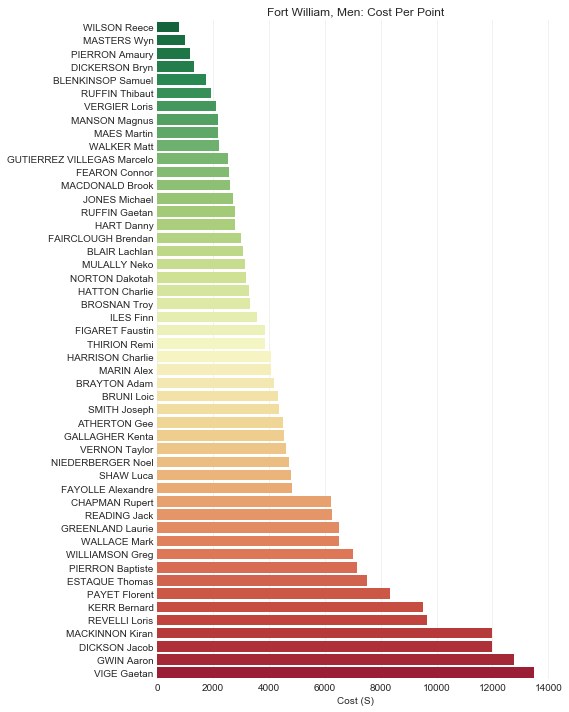

In [523]:
cnt = len( dfl[dfl.points > 0] )

dfl['dpp'] = dfl['cost']/dfl['points']
data = dfl.sort_values( 'dpp', ascending=True )

plt.figure(figsize=(8,10 if 'm' == gender else 5))
plot = sns.barplot( data['dpp'][:cnt], data['name_x'][:cnt], palette='RdYlGn_r' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Cost Per Point', xlabel='Cost (S)', ylabel='' )

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_cost_per_point.png', dpi=dpi )

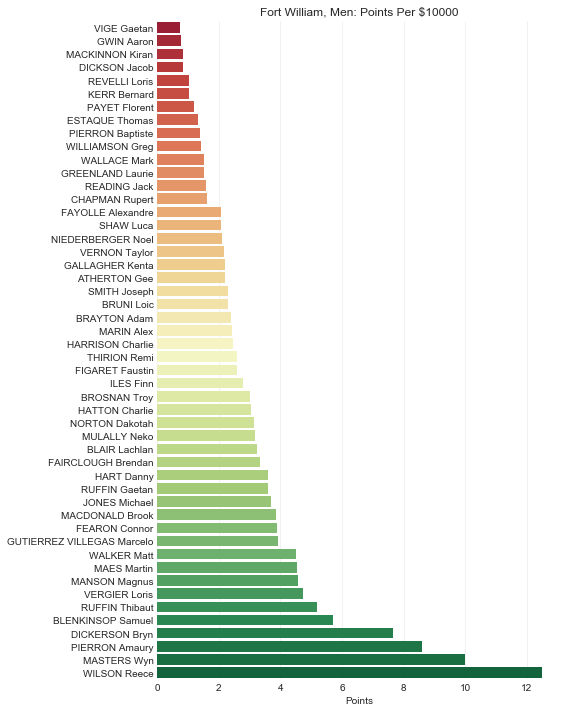

In [524]:
dfl['ppd'] = dfl['points'] / (dfl['cost']/10000)
data = dfl[:cnt].sort_values( 'ppd', ascending=True )

plt.figure(figsize=(8,10 if 'm' == gender else 4))
plot = sns.barplot( data['ppd'], data['name_x'], palette='RdYlGn' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Points Per $10000', xlabel='Points', ylabel='' )
# plot.invert_xaxis()

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_points_per_dollar.png', dpi=dpi )

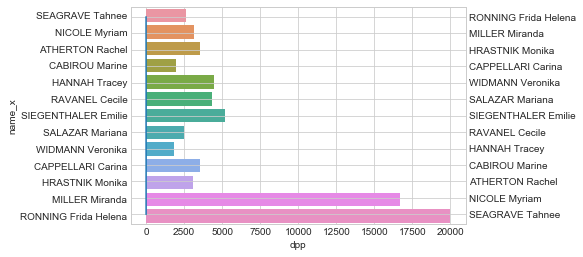

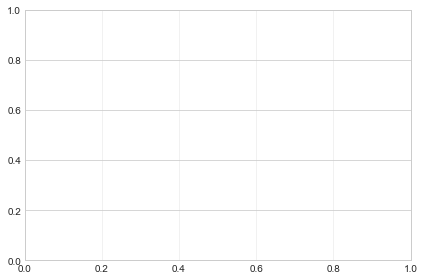

In [509]:
# Attempt to combine

cnt = len( dfl[dfl.points > 0] )

dfl['dpp'] = dfl['cost']/dfl['points']
dfl['ppd'] = dfl['points'] / (dfl['cost']/10000)

fig, ax = plt.subplots()

# plt.figure(figsize=(8,10 if 'm' == gender else 5))
sns.barplot( x='dpp', y='name_x', data=dfl[:cnt], ax=ax ) #, palette=colors )

ax2 = ax.twinx()

# plot1 = sns.barplot( dfl['ppd'][:cnt], dfl['name_x'][:cnt], ax=ax2 ) #, palette=colors )
ax2.plot( dfl['ppd'][:cnt], dfl['name_x'][:cnt] ) #, palette=colors )
# plot1.invert_xaxis()

plt.show()

sns.despine()
# plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
# plot.set( title=chart_title_prefix + ': Cost Per Point', xlabel='Cost (S)', ylabel='' )

plt.tight_layout()

In [514]:
dfx = df[['name', 'points', 'rank', 'WorldCupRank', 'UciRank', 'start_rev']].copy().dropna()
dfx['UciPerf'] = round( dfx['UciRank'] / dfx['points'], 2 )
dfx['UciRankPerf'] = round( dfx['UciRank'] / dfx['rank'], 2 )
dfx['RacePerf'] = dfx['start_rev'] / dfx['points']
dfx['RaceRankPerf'] = dfx['start_rev'] / dfx['rank']
dfx['WcRankPerf'] = dfx['WorldCupRank'] / dfx['rank']
# dfx['dpp'] = round( dfx['cost']/dfx['points'], 2 )
# dfx['ppd'] = round( dfx['points'] / (dfx['cost']/10000), 2 )

In [515]:
dfx.sort_values( 'UciRankPerf', ascending=False ).head()

,name,points,rank,WorldCupRank,UciRank,start_rev,UciPerf,UciRankPerf,RacePerf,RaceRankPerf,WcRankPerf
6,CURD Katy,80.0,7.0,9,53,10.0,0.660000,7.57,0.125000,1.428571,1.285714
5,RAVANEL Cecile,115.0,6.0,5,38,5.0,0.330000,6.33,0.043478,0.833333,0.833333
12,A'HERN Sian,35.0,13.0,0,35,11.0,1.000000,2.69,0.314286,0.846154,0.000000
15,MOLLOY Tegan,0.0,16.0,0,40,16.0,inf,2.50,inf,1.000000,0.000000
8,SALAZAR Mariana,65.0,9.0,10,22,9.0,0.340000,2.44,0.138462,1.000000,1.111111


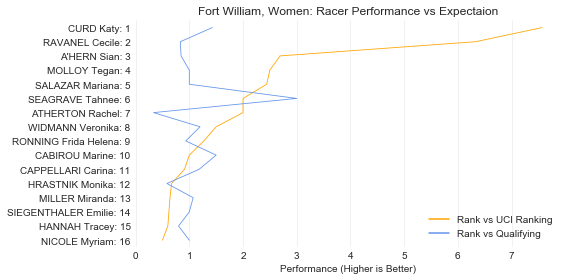

In [517]:
data = dfx.sort_values( 'UciRankPerf', ascending=False ).reset_index( drop=True )

# ylabels = [ str(i+1) + ' ' + name + ' (' + str(data['UciRank'][i]) + '/' + str(data['rank'][i])[:-2] + ')' for i, name in enumerate( data['name'] ) ]
ylabels = [ name + ': ' + str(i+1) for i, name in enumerate( data['name'] ) ]
cols = [ 'orange', 'cornflowerblue', 'green', 'red' ]

plt.figure(figsize=(8,10 if 'm' == gender else 4))
for idx, col in enumerate( [ 'UciRankPerf', 'RaceRankPerf' ] ):
    plot = sns.pointplot( data[col], data['name'], scale=0.3, color=cols[idx], markers='' )

leg1 = mlines.Line2D( [], [], color=cols[0], marker='', markersize=10, label='Rank vs UCI Ranking', linestyle='-' )
leg2 = mlines.Line2D( [], [], color=cols[1], marker='', markersize=10, label='Rank vs Qualifying', linestyle='-' )
plt.legend( handles=[leg1, leg2] )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Racer Performance vs Expectaion', xlabel='Performance (Higher is Better)', ylabel='' )
plot.set_yticklabels( ylabels )

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_finals_performance.png', dpi=dpi )

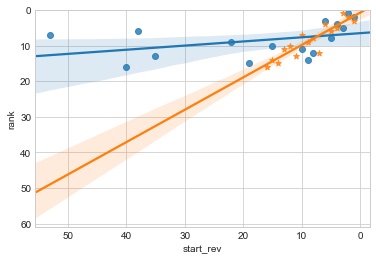

In [513]:
plot1 = sns.regplot( data['UciRank'], data['rank'], marker='o' )
plot2 = sns.regplot( data['start_rev'], data['rank'], marker='*' )
plt.ylim( 0, 61 )
plot1.invert_xaxis()
plot1.invert_yaxis()
